# Day 1 - using NumPy

## NumPy arrays

The Python language has several native data structures used to store and manipulate data. These include the list (e.g. `['item 1', 'item 2']`), the dictionary (e.g. `{'eggs': 2, 'lemons': 12}`), the tuple (e.g. `(0, 2, 'no value', True)`), and the set (e.g. `set(('oak', 'pine', 'birch'))`).

The NumPy array is an additional data structure added by the NumPy package. It allows for more convenient numerical calculations in Python, which are also faster than attempting to use the native Python structures for numerics. This is primarily because NumPy is partially written in C, and NumPy arrays can be handled internally by NumPy as C objects, then passed back to you in Python.

In order to use NumPy arrays, we need to import NumPy:

In [1]:
import numpy as np

Now we can create a NumPy array using the numpy.array constructor:

In [2]:
example_array = np.array([1, 2, 3])
example_array

array([1, 2, 3])

We create the numpy array by calling the constructor function `np.array` on what we want the contents of the array to be, in this case the integers 1, 2, and 3.

Note we put them into a list first by wrapping these numbers with brackets. You can also pass tuples as arguments to create a NumPy array:

In [3]:
example_array_from_tuple = np.array((1, 2, 3))
example_array_from_tuple

array([1, 2, 3])

### Accessing array elements

Like a list, you can access the elements of an array using indices:

In [4]:
print(example_array[0])
print(example_array[-1])

1
3


You can also use list "slice notation" to get partial subsets of the array:

In [5]:
example_array[0:2:1]

array([1, 2])

Slice notation takes the form of `start:stop:step`, where `start` is the index you want to start at, `stop-1` is where you want to stop, and `step` gives the step size as you jump from `start` to `stop-1`.

For the simple slice above, you can abbreviate the slice notation because it assumes the default  `start` to be the first index, a default `stop` at the last index, and a default `step` of 1:

In [6]:
example_array[:2]

array([1, 2])

Here we only wanted to change `stop`, so you can leave the other fields blank and drop the second colon. Let's look at a more complicated example:

In [7]:
longer_array = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
longer_array[1:8:2]

array([1, 3, 5, 7])

We start off at the second element (1), then jump in steps of 2 until we get to the eighth element (7).

Notice that `start` is inclusive, but `stop` is not:

In [8]:
longer_array[1:7:2]

array([1, 3, 5])

#### Task:
Try creating an array that contains the integers 1 though 10, and access every 3rd element, i.e. you should have as your output
```
array([1, 4, 7, 10])
```

In [9]:
your_array = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
your_array[::3]

array([ 1,  4,  7, 10])

### Higher dimensional arrays

So far we've been looking at only 1-dimensional arrays, but arrays can be multi-dimensional:

In [10]:
np.array([[1, 0], [0, 1]]) # this is a (2, 2) array

array([[1, 0],
       [0, 1]])

In [11]:
np.array([[[1, 0], [0, 1]], [[0, 1], [1, 0]]]) # this is a (2, 2, 2) array

array([[[1, 0],
        [0, 1]],

       [[0, 1],
        [1, 0]]])

### Constructing arrays from functions and Array Shape

Especially for long or many-dimensional arrays, it is laborious to build arrays by hand-typing in their elements. You can use various functions in NumPy to automatically create arrays with different kinds of elements.

For example, the `numpy.zeros` function creates an array filled with zeros:

In [12]:
np.zeros(5)

array([0., 0., 0., 0., 0.])

I put in a 5 as an argument and got out a 1D array of length 5. If I want a higher dimensional array of zeros, I need to put in a tuple holding the length along each "axis" of the array. This tuple is called the "shape" of the array:

In [13]:
zero_array = np.zeros((2, 3, 4))
zero_array

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]])

Here I put in the tuple `(2, 3, 4)` as the argument, meaning I am asking for an array full of zeros, with shape `(2, 3, 4)`. If I want to check the shape of an array I can examine the `.shape` attribute of the array:

In [14]:
zero_array.shape

(2, 3, 4)

You can also reshape arrays into higher or lower dimensions:

In [15]:
np.arange(10).reshape(2, 5)

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [16]:
a = np.arange(6).reshape(2, 3)
print(repr(a))
print(26*'-')
print(repr(a.reshape(6)))

array([[0, 1, 2],
       [3, 4, 5]])
--------------------------
array([0, 1, 2, 3, 4, 5])


Above we used the `numpy.arange` function, which produces a "flat" (1D) array of numbers that increase sequentially. You can look up more details about this and other numpy functions using [their documentation](https://numpy.org/doc/stable/reference/generated/numpy.arange.html).

#### Task:
The array below has 123456 elements. Try reshaping it so it's first axis has length 1929.

Hint: the `.reshape` method lets you specify an axis to have length -1, which will automatically determine that axis's length. For example,
```python
np.arange(10).reshape(2, -1)
```

will reshape to a `(2, 5)` array.

In [17]:
huge_array = np.arange(123456)

In [21]:
reshaped_huge_array = huge_array.reshape(1929, -1)
print(repr(reshaped_huge_array))
print(42*'-')
reshaped_huge_array.shape

array([[     0,      1,      2, ...,     61,     62,     63],
       [    64,     65,     66, ...,    125,    126,    127],
       [   128,    129,    130, ...,    189,    190,    191],
       ...,
       [123264, 123265, 123266, ..., 123325, 123326, 123327],
       [123328, 123329, 123330, ..., 123389, 123390, 123391],
       [123392, 123393, 123394, ..., 123453, 123454, 123455]])
------------------------------------------


(1929, 64)

### Setting array values

You can explicitly set array values using either indices or slice-notation:

In [22]:
array = np.zeros(4)
array

array([0., 0., 0., 0.])

In [23]:
array[0] = 1
array

array([1., 0., 0., 0.])

In [24]:
array[2:] = 1
array

array([1., 0., 1., 1.])

This is especially useful on multidimensional arrays, where you can set entire rows/columns to a specific value:

In [25]:
array = np.arange(24).reshape(6, 4)
array

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [26]:
array[:, 0] = 0
array

array([[ 0,  1,  2,  3],
       [ 0,  5,  6,  7],
       [ 0,  9, 10, 11],
       [ 0, 13, 14, 15],
       [ 0, 17, 18, 19],
       [ 0, 21, 22, 23]])

In [27]:
array[0, :] = 0
array

array([[ 0,  0,  0,  0],
       [ 0,  5,  6,  7],
       [ 0,  9, 10, 11],
       [ 0, 13, 14, 15],
       [ 0, 17, 18, 19],
       [ 0, 21, 22, 23]])

Here we set both the first row and the first column to zero. This also demonstrates how to index higher dimensional arrays: you use a comma to separate the indices for each axis. You can use a colon with no `start:stop:step` arguments to select an entire axis, as above.

#### Task:
Set the values of the array below to alternate between 1 and 2 in each row ans column, i.e. to look like
```
1, 2, 1, ...
2, 1, 2, ...
1, 2, 1, ...
.  .  .
.  .  .
```

In [41]:
array = np.zeros(10**2, dtype=int).reshape(10, 10)
array

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [44]:
array[::2, :] = 1 # set every other row to 1
array[1::2, :] = 2 # set the remaining rows to 2

array[::2, 1::2] = 2 # for every other row, set every other column (shifted by 1) to 2
array[1::2, 1::2] = 1 # for the remaing rows, set every other column (shifted by 1) to 1
array

array([[1, 2, 1, 2, 1, 2, 1, 2, 1, 2],
       [2, 1, 2, 1, 2, 1, 2, 1, 2, 1],
       [1, 2, 1, 2, 1, 2, 1, 2, 1, 2],
       [2, 1, 2, 1, 2, 1, 2, 1, 2, 1],
       [1, 2, 1, 2, 1, 2, 1, 2, 1, 2],
       [2, 1, 2, 1, 2, 1, 2, 1, 2, 1],
       [1, 2, 1, 2, 1, 2, 1, 2, 1, 2],
       [2, 1, 2, 1, 2, 1, 2, 1, 2, 1],
       [1, 2, 1, 2, 1, 2, 1, 2, 1, 2],
       [2, 1, 2, 1, 2, 1, 2, 1, 2, 1]])

## Performing calculations with NumPy arrays

### Evaluating basic functions

How can we use Python and NumPy to perform a simple mathematical task, like defining a function, evaluating it on some inputs, and plotting it?

We'll leave the details on plotting for another day, I'll just provide the code to make a plot below. Instead let's focus on the first two steps.

First, we need to define some inputs. Let's use the real numbers in the closed interval $[0, 1]$:

In [45]:
xs = np.linspace(0, 1, 40)
xs

array([0.        , 0.02564103, 0.05128205, 0.07692308, 0.1025641 ,
       0.12820513, 0.15384615, 0.17948718, 0.20512821, 0.23076923,
       0.25641026, 0.28205128, 0.30769231, 0.33333333, 0.35897436,
       0.38461538, 0.41025641, 0.43589744, 0.46153846, 0.48717949,
       0.51282051, 0.53846154, 0.56410256, 0.58974359, 0.61538462,
       0.64102564, 0.66666667, 0.69230769, 0.71794872, 0.74358974,
       0.76923077, 0.79487179, 0.82051282, 0.84615385, 0.87179487,
       0.8974359 , 0.92307692, 0.94871795, 0.97435897, 1.        ])

Of course we can't actually get _all_ of the numbers in that interval, but we can sample that interval to approximate a smooth set. 

Here we used the `numpy.linspace` function to get 40 samples: the first argument is the left endpoint, the second value the right input, and the third value the number of samples to output. They are evenly spaced.

Now we need to define a function. Let's pick $f(x) = x^2$ as an example:

In [46]:
def f(x):
    return x**2

So now what do we do? Well it turns out all we need to do is plug our array into `f`:

In [47]:
ys = f(xs)
ys

array([0.00000000e+00, 6.57462196e-04, 2.62984878e-03, 5.91715976e-03,
       1.05193951e-02, 1.64365549e-02, 2.36686391e-02, 3.22156476e-02,
       4.20775805e-02, 5.32544379e-02, 6.57462196e-02, 7.95529257e-02,
       9.46745562e-02, 1.11111111e-01, 1.28862590e-01, 1.47928994e-01,
       1.68310322e-01, 1.90006575e-01, 2.13017751e-01, 2.37343853e-01,
       2.62984878e-01, 2.89940828e-01, 3.18211703e-01, 3.47797502e-01,
       3.78698225e-01, 4.10913872e-01, 4.44444444e-01, 4.79289941e-01,
       5.15450362e-01, 5.52925707e-01, 5.91715976e-01, 6.31821170e-01,
       6.73241289e-01, 7.15976331e-01, 7.60026298e-01, 8.05391190e-01,
       8.52071006e-01, 9.00065746e-01, 9.49375411e-01, 1.00000000e+00])

In many cases, and in all cases for basic math operators like `+, -, *, /, ^` (and less basic ones like `//` and `@`), you can just apply them directly to NumPy arrays. In fact, I could have just set `ys` equal to this:

In [48]:
xs**2

array([0.00000000e+00, 6.57462196e-04, 2.62984878e-03, 5.91715976e-03,
       1.05193951e-02, 1.64365549e-02, 2.36686391e-02, 3.22156476e-02,
       4.20775805e-02, 5.32544379e-02, 6.57462196e-02, 7.95529257e-02,
       9.46745562e-02, 1.11111111e-01, 1.28862590e-01, 1.47928994e-01,
       1.68310322e-01, 1.90006575e-01, 2.13017751e-01, 2.37343853e-01,
       2.62984878e-01, 2.89940828e-01, 3.18211703e-01, 3.47797502e-01,
       3.78698225e-01, 4.10913872e-01, 4.44444444e-01, 4.79289941e-01,
       5.15450362e-01, 5.52925707e-01, 5.91715976e-01, 6.31821170e-01,
       6.73241289e-01, 7.15976331e-01, 7.60026298e-01, 8.05391190e-01,
       8.52071006e-01, 9.00065746e-01, 9.49375411e-01, 1.00000000e+00])

For any complicated function it's worth defining it explicitly like we did above, though. So let's see how this worked:

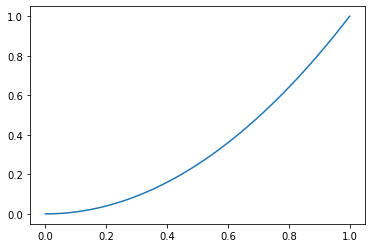

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(xs, ys)
pass # this stops plt.plot from returning a value to the output

Looks good! 

#### Task:
Invent your own function and plot it using the snippet `plt.plot(xs, your_ys)` (you can change the x-coordinates too if you like). 

You could try a function like $x^2 + x$, or try to write a floor or ceiling function that rounds to the nearest smaller or bigger integer. Feel free to experiment!

In [50]:
def ceiling(x):
    return (x+1)//1

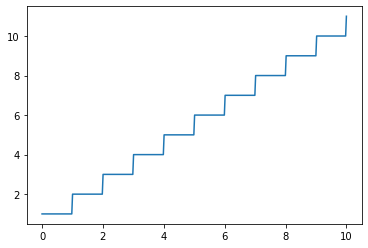

In [55]:
my_xs = np.linspace(0, 10, 400)
my_ys = ceiling(my_xs)

plt.plot(my_xs, my_ys)
pass # this stops plt.plot from returning a value to the output

### How not to evaluate functions

Now I want to mention another way we could have gone about this: in other programming languages, it is common to stuff like this:

In [56]:
ys = np.zeros(40)
for i in range(40):
    ys[i] = f(xs[i])

In [57]:
ys

array([0.00000000e+00, 6.57462196e-04, 2.62984878e-03, 5.91715976e-03,
       1.05193951e-02, 1.64365549e-02, 2.36686391e-02, 3.22156476e-02,
       4.20775805e-02, 5.32544379e-02, 6.57462196e-02, 7.95529257e-02,
       9.46745562e-02, 1.11111111e-01, 1.28862590e-01, 1.47928994e-01,
       1.68310322e-01, 1.90006575e-01, 2.13017751e-01, 2.37343853e-01,
       2.62984878e-01, 2.89940828e-01, 3.18211703e-01, 3.47797502e-01,
       3.78698225e-01, 4.10913872e-01, 4.44444444e-01, 4.79289941e-01,
       5.15450362e-01, 5.52925707e-01, 5.91715976e-01, 6.31821170e-01,
       6.73241289e-01, 7.15976331e-01, 7.60026298e-01, 8.05391190e-01,
       8.52071006e-01, 9.00065746e-01, 9.49375411e-01, 1.00000000e+00])

Here we assign `ys` upfront as an array filled with `0`s, then we loop over the xs and individually assign each y-value to the result from `f`. This gives the same result.

In a language like C this is the standard way to do things, but when using NumPy arrays you should try to avoid doing this whenever possible. NumPy arrays use what is called "vectorization" to apply functions like `**2` to an array, which is _much_ faster than looping over that array in Python.

If you're curious about why this is I can suggest some reading, but you don't need to worry about the explanation right now, just remember you can apply functions directly to arrays in many, many cases.

#### Task:
To demonstrate why the loop method is worse than directly operating on arrays, we can use the timeit module to time how long each of these take. 

If you type `%%timeit` in a cell, everything executed below in that cell will be run repeatedly and timed, and it will show the average time taken and standard deviation. For example:

In [58]:
%%timeit
for i in range(10):
    pass # do each loop nothing

312 ns ± 4.86 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [59]:
%%timeit
for i in range(10):
    for j in range(10):
        pass # still doing nothing

3.4 µs ± 59.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Interestingly even though we do nothing in either bit of code above, they still take some time and one even takes 10 times longer than the other!

But I'm getting off topic a bit. Now you try using `%%timeit` on `f(xs)` and on the loop method to see how long they take:

In [60]:
%%timeit
f(xs)

818 ns ± 16.8 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [61]:
%%timeit
for i in range(40):
    f(xs[i])

19.9 µs ± 512 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### Other common math functions

What if you want to use an exponential or trigonometric function? NumPy has those in its lowest level namespace:

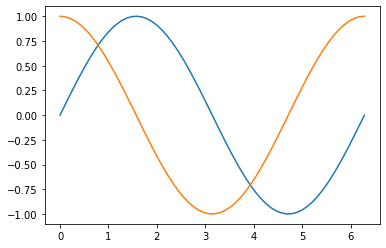

In [62]:
xs = np.linspace(0, 2*np.pi, 60)

plt.plot(xs, np.sin(xs))
plt.plot(xs, np.cos(xs))
pass

#### Task:
Pick any mathematical function you want from [numpy's docs](https://numpy.org/doc/1.18/reference/routines.math.html) and plot it using the `plt.plot(xs, ys)` snippet.

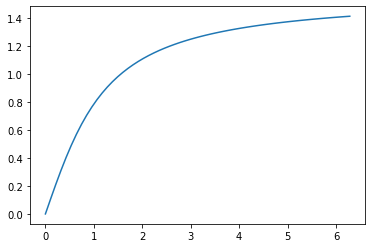

In [63]:
plt.plot(xs, np.arctan(xs))
pass

### Taking derivatives of data

Let's do something a bit more complicated: let's numerically evaluate a derivative.

Remember that a formula for a (symmetric) finite difference derivative is

$$\frac{df}{dx} = \frac{f(x+\epsilon) - f(x)}{\epsilon}.$$

(Note this is not a great formula to use if you want good accuracy)

Let's write that in NumPy arrays:

In [64]:
xs = np.linspace(0, 1, 60)

dx = xs[1] - xs[0] # we find the difference between the points to use as our epsilon

ys = f(xs)

Calculating the $\Delta y$ term is where it gets trickier:

In [65]:
dys = ys[1:] - ys[:-1]

What we do is take the `ys` array, excluding the first element, and subtract the array but excluding the last element. This gives us an array of $y_i - y_{i-1}$. Then the derivative estimate is:

In [66]:
derivs = dys/dx

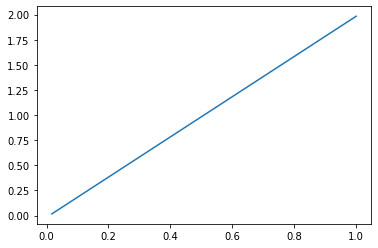

In [67]:
plt.plot(xs[1:], derivs)
pass

This looks about right! Note that we had to drop the first x since our y-values were 1 shorter. 

NumPy actually has a builtin function for finite differences called `numpy.gradient` that gives **much** more accurate results, and without shrinking the array the way we did above:

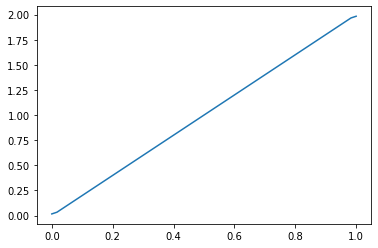

In [68]:
xs = np.linspace(0, 1, 60)

dx = xs[1] - xs[0]

ys = f(xs)

derivs = np.gradient(ys, dx)

plt.plot(xs, derivs)
pass

#### Task:
Try to write some code that integrates our $f(x) = x^2$ function instead of differentiating it.

You could do this with a Riemann sum:

$$\sum_i f(x_i) \Delta x_i,$$

or you could try out the Trapezoid rule:

$$\sum_i \frac{f(x_{i-1}) + f(x_i)}{2} \Delta x_i.$$

A hint is that NumPy arrays have a `.sum` method, that sums up all of the elements in an array into a single number (or sum over a specific axis, check the [documentation](https://numpy.org/doc/stable/reference/generated/numpy.sum.html#numpy.sum) for more info):

In [69]:
a = np.arange(3)
print(repr(a))
a.sum()

array([0, 1, 2])


3

You can use this method (or equivalently call `np.sum` on an array) to help calculate the integral sum.

I recommend by starting with just evaluating the integral over the range $[0, 1]$ that we've been working with so far.

#### Solution:

I actually prefer to code up a version of the trapezoid rule that applies for uniform spacing:
$$ \Delta x\left(\frac{f(x_0) + f(x_N)}{2} + \sum_{i=1}^{N-1} f(x_i) \right) $$

In [73]:
def trapz_uniform(arr, dx):
    arr = dx*arr
    return 0.5*(arr[0] + 2*arr[1:-1].sum() + arr[-1])

In [74]:
trapz_uniform(ys, dx)

0.3333812122953174

The analytic answer is $\int_0^1 x^2 dx = 1/3 \; x^3\; |_0^1 = 1/3$.